# check-controllability-and-observability

Example to check the controllability and the observability of a state space system.
RMM, 6 Sep 2010


In [13]:
import numpy as np  # Load the scipy functions
import control as ct
from matplotlib import pyplot as plt

# Parameters defining the system

m = 250.0  # system mass
k = 40.0   # spring constant
b = 60.0   # damping constant

# System matrices
A = np.array([[1, -1, 1.],
             [1, -k/m, -b/m],
             [1, 1, 1]])

B = np.array([[0],
             [1/m],
             [1]])

C = np.array([[1., 0, 1.]])

sys = ct.ss(A, B, C, 0)

# Check controllability
Wc = ct.ctrb(A, B)
display("Wc = ", Wc)
# np.linalg.matrix_rank(Wc)

# Check Observability
Wo = ct.obsv(A, C)
display("Wo = ", Wo)

'Wc = '

array([[ 0.       ,  0.996    ,  2.24064  ],
       [ 0.004    , -0.24064  ,  0.7935424],
       [ 1.       ,  1.004    ,  1.75936  ]])

'Wo = '

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [4.00000000e+00, 1.11022302e-16, 4.00000000e+00]])

TransferFunction(array([1]), array([1, 2, 1]))

_____Eigenvalue______ Damping___ Frequency_
        -1                     1          1
        -1                     1          1


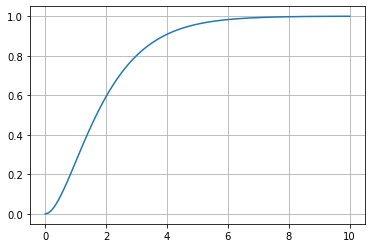

In [104]:
omega_n=1
zeta=1
G = ct.tf([omega_n], [1,2*omega_n*zeta ,omega_n**2])
display(G)
wn, zeta, poles = ct.damp(G)
# T=np.arange(0,10,0.1)
T=np.linspace(0, 10, 100, endpoint=True)#
T,yout=ct.step_response(G,T)
plt.plot(T,yout)
plt.grid()


TransferFunction(array([1]), array([ 1, 10]))

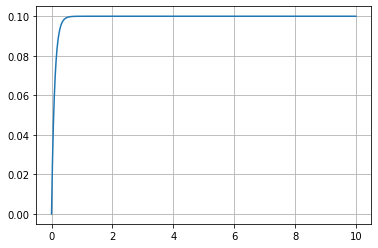

In [108]:
num=[1]
den=[1,10]
PT1=ct.tf(num,den)
display(PT1)
start =0
stop=10
step=0.01
T=np.arange(start, stop, step)#
T,yout=ct.step_response(PT1,T)
# T,yout=ct.step_response(G,T)
plt.plot(T,yout)
plt.grid()

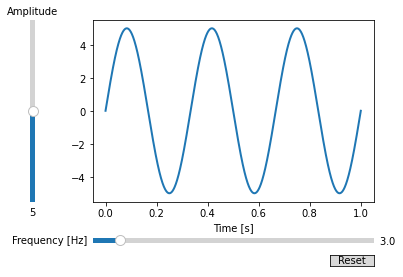

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()